# **Final Project: Spatial Analysis with Python**

## 1 Creating data
    All data is completely invented and randomly computed.

In [38]:
# Importing packages
import random
import csv
import math

# Creating column names
header_col1='true_class'
header_col2='predicted_class'
header_col3='size_cm2'
header_col4='perimeter_cm'
header_col5='died'

# Deciding in total number of data points/objects within a hypothetical landscape
n=100

# Randomly computing class dependencies of each data point (= true class) and those of the predicted class in a hypothetical image classification
col1=[random.randint(1,3) for _ in range(n)]
col2=[]
indices=list(range(n))
random.shuffle(indices)
same_indices=set(indices[:75]) # An automatic agreement of 75 % was decided on

for i in range(n):
    if i in same_indices:
        col2.append(col1[i])
    else:
        col2.append(random.randint(1, 3)) # Randomly computing class dependencies of remaining 25 % of data points

# Randomly computing sizes of each object (min and max size were set at 1 and 100 cm2, respectively)
col3 = [random.randint(1, 100) for _ in range(n)]

# Randomly computing perimeters of each object (max perimeter was set at 200 cm)
col4=[]
for size in col3:
    min_perimeter = max(4, int(4 * math.sqrt(size))) # min perimeter in accordance with the size of an object to avoid illogical data values
    if min_perimeter > 200:
        min_perimeter = 200
    perimeter = random.randint(min_perimeter, 200)
    col4.append(perimeter)

# Randomly deciding on the 'fate' of each object where 25 % of a hypothetical population died and 75 % survived (e.g. due to environmental disturbance)
col5=['yes']*25+['no']*75
random.shuffle(col5)

# Adding data to csv file
rows = zip(col1, col2, col3, col4, col5)
path='C:\\Users\\larab\\OneDrive\\Desktop\\Clase_proyecto\\FinalProject_LaraVirginiaBirkart\\confusion_matrix_data.csv'
with open(path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([header_col1, header_col2, header_col3, header_col4, header_col5])
    writer.writerows(rows)

## 2 Confusion matrix

Confusion Matrix:
 [[26  4  1]
 [ 1 27  1]
 [ 4  4 32]]
Overall Accuracy: 0.8500
Kappa = 0.775
Substantial agreement.


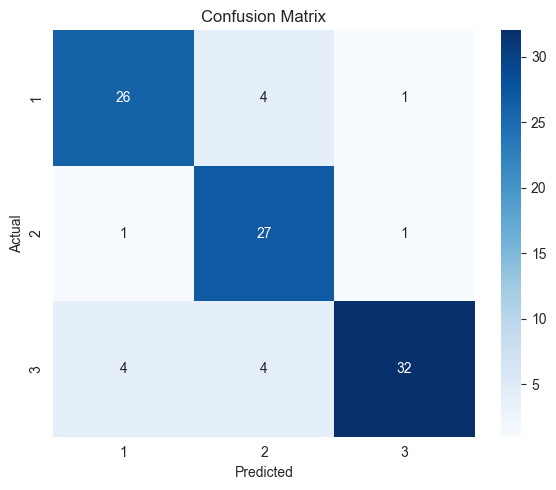

In [39]:
# Importing packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating overall accuracy and kappa index
df_confusion_matrix = pd.read_csv(path)
true=df_confusion_matrix['true_class']
predicted=df_confusion_matrix['predicted_class']
cm = confusion_matrix(true, predicted)
accuracy = accuracy_score(true, predicted)
kappa = cohen_kappa_score(true, predicted)

print("Confusion Matrix:\n", cm)
print(f"Overall Accuracy: {accuracy:.4f}")
kappa_interpretation= (
    "Perfect agreement." if kappa == 1 else
    "Near perfect agreement." if kappa >= 0.81 else
    "Substantial agreement." if kappa >= 0.61 else
    "Moderate agreement." if kappa >= 0.41 else
    "Fair agreement." if kappa >= 0.21 else
    "Slight agreement." if kappa >= 0.10 else
    "No agreement."
)
print(f"Kappa = {kappa:.3f}\n{kappa_interpretation}")

# Visualising Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(true), yticklabels=np.unique(true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### *References*
Cohen's Kappa Index Interpretation
[Statology](https://www.statology.org/cohens-kappa-statistic/)

## 3 Size and perimeter exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   true_class       100 non-null    int64 
 1   predicted_class  100 non-null    int64 
 2   size_cm2         100 non-null    int64 
 3   perimeter_cm     100 non-null    int64 
 4   died             100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None


<Axes: >

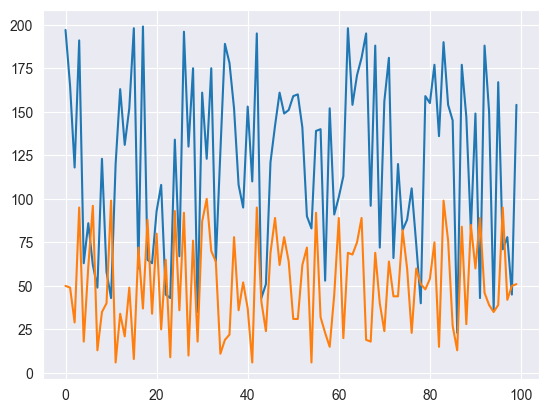

In [40]:
print(df_confusion_matrix.info())
sizes=df_confusion_matrix['size_cm2']
perimeters=df_confusion_matrix['perimeter_cm']
perimeters.plot()
sizes.plot()

In [41]:
sum3=0
for size in col3:
    sum3+=size
average_size=sum3/n
print(f'Average size: {average_size}\nMaximum size: {max(col3)}\nMinimum size: {min(col3)}')

sum4=0
variance_sum4=0
for perim in col4:
    sum4+=perim
average_perim=sum4/n
for perim in col4:
    variance_sum4+=(perim-average_perim)**2
variance=variance_sum4/n
print(f'Average perimeter: {average_perim}\nMaximum perimeter: {max(col4)}\nMinimum perimeter: {min(col4)}')

variables=['size_cm2', 'perimeter_cm']
result=df_confusion_matrix.groupby(['predicted_class'])[variables].agg(['mean','std']).reset_index()
print(result)


Average size: 51.09
Maximum size: 100
Minimum size: 6
Average perimeter: 121.96
Maximum perimeter: 199
Minimum perimeter: 23
  predicted_class   size_cm2            perimeter_cm           
                        mean        std         mean        std
0               1  41.645161  22.502664   113.677419  51.886663
1               2  55.228571  30.329645   125.800000  45.491305
2               3  55.441176  27.732697   125.558824  54.066284


## 4 Landscape ecology metrics for spatial analysis

### 4.1 Cohesion

In [42]:
pred_class=df_confusion_matrix['true_class']
perim_sum=0
var_sum=0
landscape_area=1000000 #completely invented number in cm2

with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            perimeter=int(row['perimeter_cm'])
            var=perimeter*math.sqrt(size)
            perim_sum+=perimeter
            var_sum+=var
    CohInd=(1-(perim_sum/(var_sum)))*(math.pow((1-(1/math.sqrt(landscape_area))),(-1)))*(100)

print(f'Landscape cohesion index: {CohInd:.3f}')


Landscape cohesion index: 83.651


### 4.2 Patch density

In [43]:
no_patches=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            no_patches+=1
    PD=no_patches/landscape_area*10000
    print(f'Patch density: {PD} patches per m2')

Patch density: 0.31 patches per m2


### 4.3 Landscape division index

In [44]:
ldi_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            ldi=size/landscape_area
            ldi_sum+=ldi
    LDI=(1-math.pow((ldi_sum),(2)))
    print(f'Landscape division index: {LDI}')

Landscape division index: 0.999998374375


### 4.4 Splitting index

In [45]:
size_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            size_sum+=size
    SPLIT=(math.pow((landscape_area),(2)))/(math.pow((size_sum),(2)))
    print(f'Splitting index: {SPLIT}')

Splitting index: 615148.0199923107


### 4.6 Effective mesh size

In [46]:
size_sum=0
with open(path, 'r') as file:
    reader=csv.DictReader(file)
    for i,row in enumerate(reader):
        if pred_class.iloc[i]!=1:
            continue
        else:
            size=int(row['size_cm2'])
            size_sum+=size
    MESH=(math.pow((size_sum),(2)))/(landscape_area)*10000
    print(f'Effective mesh size: {MESH} m2')

Effective mesh size: 16256.250000000002 m2


### 4.7 Shannon's and Simpson's diversity and evenness index

In [51]:
class1=0
class2=0
class3=0
with open(path, 'r') as file:
    reader = csv.DictReader(file)
    for i, row in enumerate(reader):
        if pred_class.iloc[i]==1:
            class1+=1
        elif pred_class.iloc[i]==2:
            class2+=1
        else:
            class3+=1
    proportion1=class1/n
    proportion2=class2/n
    proportion3=class3/n
    SHDI=-((proportion1*math.log(proportion1,10))+(proportion2*math.log(proportion2,10))+(proportion3*math.log(proportion3,10)))
    SIDI=(1-(math.pow(proportion1,2)+math.pow(proportion2,2)+math.pow(proportion3,2)))
    SHEI=-((proportion1*math.log(proportion1,10))+(proportion2*math.log(proportion2,10))+(proportion3*math.log(proportion3,10)))/math.log(3,10)
    SIEI=(1-(math.pow(proportion1,2)+math.pow(proportion2,2)+math.pow(proportion3,2)))/(1-(1/3))
    print(f'Shannons Diversity Index: {SHDI}')
    print(f'Simpsons Diversity Index: {SIDI}')
    print(f'Shannons Evenness Index: {SHEI}')
    print(f'Simpsons Evenness Index: {SIEI}')

Shannons Diversity Index: 0.4727584589894932
Simpsons Diversity Index: 0.6597999999999999
Shannons Evenness Index: 0.9908560021440825
Simpsons Evenness Index: 0.9896999999999998


### *References*
Formulae for landscape metrics were obtained from
[Fragstats](https://www.researchgate.net/profile/Samuel-Cushman-2/publication/259011515_FRAGSTATS_Spatial_pattern_analysis_program_for_categorical_maps/links/564217ea08aebaaea1f8b8dd/FRAGSTATS-Spatial-pattern-analysis-program-for-categorical-maps.pdf)

## Population fate

In [49]:
###